# 多通道图像数据
除了可以表示为二维矩阵的二维图像外，更高维度的多通道图像也很常见。例如，让我们导入```hela-cells.tif```图像：

In [1]:
from skimage.io import imread
image = imread('../../data/hela-cells.tif')


In [2]:
image.shape

(512, 672, 3)

我们看到，除了像素行和列之外，现在还有一个额外的数字告诉我们数据中有三个平面。在这个例子中，每个图像对应一个通道，但对于其他数据，它们可能是z平面、时间点等。

## 操作维度

重新组织多维数据通常是必要的，以符合函数的输入要求。例如，```microshow```函数期望通道在第一个维度，所以我们必须将最后一个轴*移动*到第一个位置，为此我们使用Numpy函数```np.moveaxis```：

In [3]:
import numpy as np

image_rolled = np.moveaxis(image, source=2, destination=0)
image_rolled.shape

(3, 512, 672)

Numpy中还有很多其他函数可以进行这些轴移动操作。例如```np.swapaxes```、```np.rollaxis```等。

## 可视化多通道图像

```microshow```函数会使用合理的默认设置来显示图像：

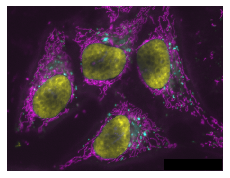

In [4]:
from microfilm.microplot import microshow
microshow(image_rolled);

默认情况下，它使用青色、洋红色、黄色的颜色图组合，但这些也可以更改：

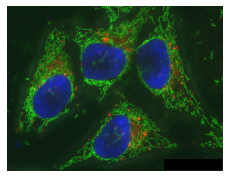

In [5]:
microshow(image_rolled, cmaps=['pure_red', 'pure_green', 'pure_blue']);

我们还可以通过分离这三个通道来独立地可视化它们。此外，我们可以使用[matplotlib子图](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)来并排排列多个图像：

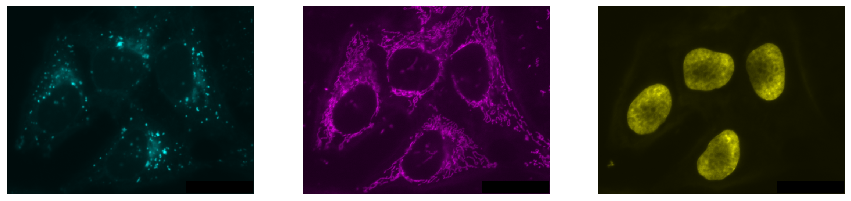

In [6]:
channel1 = image[:,:,0]
channel2 = image[:,:,1]
channel3 = image[:,:,2]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,15))

microshow(channel1, ax=axs[0], cmaps='pure_cyan')
microshow(channel2, ax=axs[1], cmaps='pure_magenta')
microshow(channel3, ax=axs[2], cmaps='pure_yellow');

## 练习
探索查找表，又称[matplotlib中的颜色图](https://matplotlib.org/stable/tutorials/colors/colormaps.html)，并尽可能地将上面的三个通道可视化得与ImageJ中的图像显示相似。